In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy as ast

In [2]:
from astropy.io import fits

In [3]:
data_1 = r"/Users/tiffon/OneDrive - etu.u-bordeaux.fr/S10/HauteEnergie/w749-750/ sourcefiles/lat_photon_weekly_w749_p305_v001.fits"

In [4]:
hdul = fits.open(data_1)

TypeError: Image data of dtype object cannot be converted to float

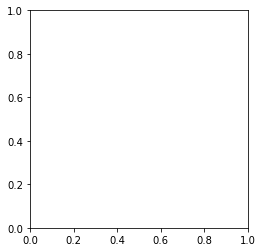

In [21]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt

# open FITS file
hdulist = fits.open(data_1)

# select the Primary HDU
hdu = hdulist[0]

# display the image
plt.imshow(hdu.data, cmap='gray')
plt.show()

In [22]:
from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)

In [29]:
from astropy.utils.data import get_pkg_data_filename
image_file = get_pkg_data_filename(data_1)
image_data = fits.getdata(data_1)
fits.getval()

TypeError: getval() missing 1 required positional argument: 'keyword'

In [28]:
print(image_data.shape)

(1583674,)


Filename: /Users/tiffon/OneDrive - etu.u-bordeaux.fr/S10/HauteEnergie/w749-750/ sourcefiles/lat_photon_weekly_w749_p305_v001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    199   1583674R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   106R x 2C   [D, D]   
Filename: /Users/tiffon/OneDrive - etu.u-bordeaux.fr/S10/HauteEnergie/w749-750/ sourcefiles/lat_photon_weekly_w750_p305_v001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    199   2135751R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   106R x 2C   [D, D]   
<TableColumns names=('ENERGY','RA','DEC','L','B','THETA','PHI','ZENITH_ANGLE','EARTH_AZIMUTH_ANGLE','TIME','EVEN

IndexError: index 1919465 is out of bounds for axis 0 with size 1583674

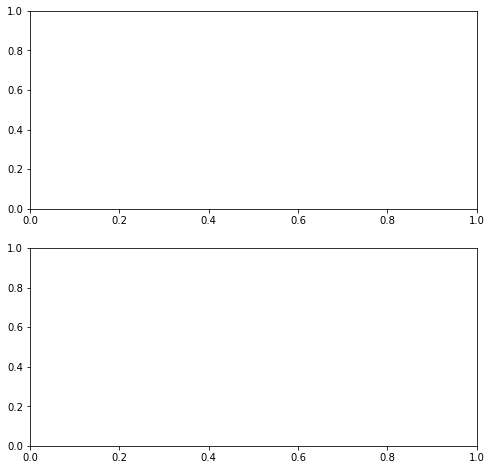

In [6]:
import os, glob, sys

# Set up matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from astropy.io import fits
from astropy.table import Table
import numpy as np				### numarray or numpy depends on the python install

fitsfile1=data_1 # path to your file number one
f1 = fits.open(fitsfile1)
fits.info(fitsfile1)
events1 = Table.read(fitsfile1,hdu=1)

fitsfile2='/Users/tiffon/OneDrive - etu.u-bordeaux.fr/S10/HauteEnergie/w749-750/ sourcefiles/lat_photon_weekly_w750_p305_v001.fits'  # path to your file number one
f2 = fits.open(fitsfile2)
fits.info(fitsfile2)
events2 = Table.read(fitsfile2,hdu=1)

# print various info (examples)
print(events1.columns)
print(events1['ENERGY'].unit)
print(events1['ENERGY'][0])

fig, axs = plt.subplots(2, 1, figsize=(8, 8))

energy1 = events1['ENERGY']
emin_mask1 = energy1 > 50000.00
zenith_angle1 = events1['ZENITH_ANGLE']
zenith_angle_mask1 = zenith_angle1 < 100
time1 = events1['TIME']
print(len(time1),time1[0],time1[1919465])
time1_min = time1 > 3.108e8 
time1_max = time1 < 3.120e8
time1_cut = time1_min & time1_max
time1_cut = time1_max
l1 = events1['L']
b1 = events1['B']
mask1_tot = zenith_angle_mask1 & time1_cut
#mask1_tot = zenith_angle_mask1
l1_cut = l1[mask1_tot] 
b1_cut = b1[mask1_tot] 
print(len(l1_cut))
exit(0)

energy2 = events2['ENERGY']
emin_mask2 = energy2 > 50000.00
zenith_angle2 = events2['ZENITH_ANGLE']
zenith_angle_mask2 = zenith_angle2 < 100
mask2_tot = zenith_angle_mask2

l2 = events2['L']
b2 = events2['B']
l2_cut = l2[mask2_tot] 
b2_cut = b2[mask2_tot] 

axs[0].set_xlabel('L (deg.)', fontsize=10)
axs[0].set_ylabel('B (deg.)', fontsize=10)
counts0, xedges0, yedges0, im0 = axs[0].hist2d(l1_cut,b1_cut,bins=[36,18],norm=LogNorm())
fig.colorbar(im0,ax=axs[0])

axs[1].set_xlabel('L (deg.)', fontsize=10)
axs[1].set_ylabel('B (deg.)', fontsize=10)
counts1, xedges1, yedges1, im1 = axs[1].hist2d(l2_cut,b2_cut,bins=[36,18],norm=LogNorm())
fig.colorbar(im1,ax=axs[1])
plt.show()

diff = counts0 - counts1
ratio = counts0 / counts1
#from PIL import Image
#pil_image=Image.fromarray(diff)
#pil_image.show()

fig = plt.figure()
plt.imshow(ratio)
plt.title("Plot 2D array")
plt.show()
exit(0)


In [12]:
events2

ENERGY,RA,DEC,L,B,THETA,PHI,ZENITH_ANGLE,EARTH_AZIMUTH_ANGLE,TIME,EVENT_ID,RUN_ID,RECON_VERSION,CALIB_VERSION [3],EVENT_CLASS [32],EVENT_TYPE [32],CONVERSION_TYPE,LIVETIME,DIFRSP0,DIFRSP1,DIFRSP2,DIFRSP3,DIFRSP4
MeV,deg,deg,deg,deg,deg,deg,deg,deg,s,,,,,,,,s,,,,,
float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,int32,int32,int16,int16,bool,bool,int16,float64,float32,float32,float32,float32,float32
89.48447,174.23985,-37.057045,286.80396,23.471159,62.165104,8.066693,109.61107,143.07083,687312550.7842022,48752,687312547,0,0 .. 0,False .. True,False .. False,1,0.1055833101272583,0.0,0.0,0.0,0.0,0.0
252.61736,193.17963,-39.11029,303.20334,23.760784,67.00293,352.3027,116.90877,157.37346,687312550.9321305,49233,687312547,0,0 .. 0,False .. True,False .. False,1,0.25351154804229736,0.0,0.0,0.0,0.0,0.0
187.78317,213.83594,-46.41366,317.6708,14.042953,65.57067,334.03876,114.387764,175.76341,687312551.1916251,50028,687312547,0,0 .. 0,False .. True,False .. True,0,0.5130062103271484,0.0,0.0,0.0,0.0,0.0
40.216423,194.72673,-66.78436,303.6696,-3.923309,42.885983,335.3395,92.25482,170.50719,687312551.2319291,50148,687312547,0,0 .. 0,False .. True,False .. False,1,0.5533101558685303,0.0,0.0,0.0,0.0,0.0
4808.507,217.6902,-48.808823,319.28915,10.882866,64.024796,330.5129,112.18446,178.723,687312551.9724194,52534,687312547,0,0 .. 0,False .. True,False .. False,1,1.2938004732131958,0.0,0.0,0.0,0.0,0.0
208.59225,206.4425,-48.842922,312.0616,13.063317,61.663242,338.37607,111.185486,170.80467,687312552.63437,54586,687312547,0,0 .. 0,False .. True,False .. False,1,1.9557510614395142,0.0,0.0,0.0,0.0,0.0
431.21066,217.89113,-46.969406,320.13602,12.530291,65.83985,330.90475,114.039795,178.77483,687312552.6834735,54732,687312547,0,0 .. 0,False .. True,False .. False,1,2.0048545598983765,0.0,0.0,0.0,0.0,0.0
181.88618,196.31271,-63.2524,304.48538,-0.4223215,46.261536,337.07758,95.78462,169.72633,687312552.7106347,54820,687312547,0,0 .. 0,False .. True,False .. True,0,2.032015800476074,0.0,0.0,0.0,0.0,0.0


In [17]:
ast.visualise

NameError: name 'ast' is not defined

Filename: /Users/tiffon/OneDrive - etu.u-bordeaux.fr/S10/HauteEnergie/w749-750/ sourcefiles/lat_photon_weekly_w749_p305_v001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    199   1583674R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   106R x 2C   [D, D]   
<TableColumns names=('ENERGY','RA','DEC','L','B','THETA','PHI','ZENITH_ANGLE','EARTH_AZIMUTH_ANGLE','TIME','EVENT_ID','RUN_ID','RECON_VERSION','CALIB_VERSION','EVENT_CLASS','EVENT_TYPE','CONVERSION_TYPE','LIVETIME','DIFRSP0','DIFRSP1','DIFRSP2','DIFRSP3','DIFRSP4')>
MeV
370.36444


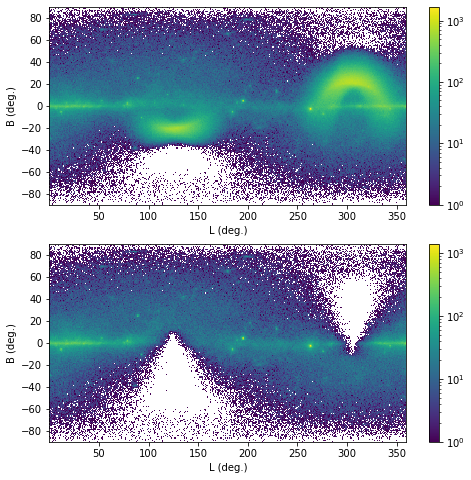

In [1]:
import os, glob, sys

# Set up matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from astropy.io import fits
from astropy.table import Table
import numpy as np				### numarray or numpy depends on the python install


#fitsfile='/mnt/e/data2/fermi_analysis/all-sky-10years-5gev.fits'    # put here the path to your favorite file
fitsfile="/Users/tiffon/OneDrive - etu.u-bordeaux.fr/S10/HauteEnergie/w749-750/ sourcefiles/lat_photon_weekly_w749_p305_v001.fits"
f1 = fits.open(fitsfile)

fits.info(fitsfile)
events = Table.read(fitsfile,hdu=1)
print(events.columns)
print(events['ENERGY'].unit)
print(events['ENERGY'][0])

fig, axs = plt.subplots(2, 1, figsize=(8, 8))

energy = events['ENERGY']
emin_mask = energy > 50000.00
l = events['L']
b = events['B']

axs[0].set_xlabel('L (deg.)', fontsize=10)
axs[0].set_ylabel('B (deg.)', fontsize=10)
counts0, xedges0, yedges0, im0 = axs[0].hist2d(l,b,bins=[360,180],norm=LogNorm())
fig.colorbar(im0,ax=axs[0])

zenith_angle = events['ZENITH_ANGLE']
zenith_angle_mask = zenith_angle < 80
l_cut = l[zenith_angle_mask] 
b_cut = b[zenith_angle_mask] 
axs[1].set_xlabel('L (deg.)', fontsize=10)
axs[1].set_ylabel('B (deg.)', fontsize=10)
counts1, xedges1, yedges1, im1 = axs[1].hist2d(l_cut,b_cut,bins=[360,180],norm=LogNorm())
fig.colorbar(im1,ax=axs[1])
plt.show()




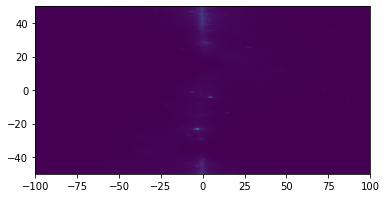

In [15]:
plt.imshow(counts1,extent=(-100,100,-50,50))

Filename: /Users/tiffon/OneDrive - etu.u-bordeaux.fr/S10/HauteEnergie/w749-750/ sourcefiles/lat_photon_weekly_w749_p305_v001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    199   1583674R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   106R x 2C   [D, D]   
<TableColumns names=('ENERGY','RA','DEC','L','B','THETA','PHI','ZENITH_ANGLE','EARTH_AZIMUTH_ANGLE','TIME','EVENT_ID','RUN_ID','RECON_VERSION','CALIB_VERSION','EVENT_CLASS','EVENT_TYPE','CONVERSION_TYPE','LIVETIME','DIFRSP0','DIFRSP1','DIFRSP2','DIFRSP3','DIFRSP4')>
MeV
370.36444


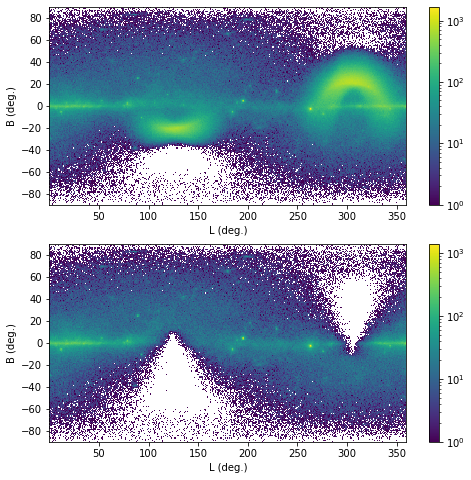

In [17]:
import os, glob, sys

# Configuration de matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from astropy.io import fits      # Importe la bibliothèque FITS d'astropy
from astropy.table import Table  # Importe la bibliothèque Table d'astropy
import numpy as np               # Importe la bibliothèque numpy

# Chemin vers le fichier FITS
fitsfile="/Users/tiffon/OneDrive - etu.u-bordeaux.fr/S10/HauteEnergie/w749-750/ sourcefiles/lat_photon_weekly_w749_p305_v001.fits"

# Ouvre le fichier FITS
f1 = fits.open(fitsfile)

# Affiche les informations sur le fichier FITS
fits.info(fitsfile)

# Lit les données du fichier FITS et les stocke dans une table
events = Table.read(fitsfile, hdu=1)

# Affiche les colonnes de la table
print(events.columns)

# Affiche l'unité de l'énergie
print(events['ENERGY'].unit)

# Affiche la première valeur de l'énergie
print(events['ENERGY'][0])

# Crée un plot à deux graphiques
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# Récupère les données d'énergie
energy = events['ENERGY']

# Masque pour les énergies supérieures à 50 000
emin_mask = energy > 50000.00

# Récupère les données de longitude galactique (L) et latitude galactique (B)
l = events['L']
b = events['B']

# Configure le premier graphique
axs[0].set_xlabel('L (deg.)', fontsize=10)
axs[0].set_ylabel('B (deg.)', fontsize=10)
counts0, xedges0, yedges0, im0 = axs[0].hist2d(l, b, bins=[360,180], norm=LogNorm())
fig.colorbar(im0, ax=axs[0])

# Récupère les données d'angle zénithal
zenith_angle = events['ZENITH_ANGLE']

# Masque pour les angles zénithaux inférieurs à 80
zenith_angle_mask = zenith_angle < 80

# Applique le masque à L et B
l_cut = l[zenith_angle_mask] 
b_cut = b[zenith_angle_mask] 

# Paramétrer le second graphique
axs[1].set_xlabel('L (deg.)', fontsize=10)
axs[1].set_ylabel('B (deg.)', fontsize=10)

# Tracer le deuxième graphique
counts1, xedges1, yedges1, im1 = axs[1].hist2d(l_cut, b_cut, bins=[360,180], norm=LogNorm())

# Ajouter une barre de couleur au graphique
fig.colorbar(im1, ax=axs[1])

# Afficher les graphiques
plt.show()


In [18]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

# Charger les données des deux images
fitsfile1 = "/Users/tiffon/OneDrive - etu.u-bordeaux.fr/S10/HauteEnergie/w749-750/ sourcefiles/lat_photon_weekly_w750_p305_v001.fits"
fitsfile2 = "/Users/tiffon/OneDrive - etu.u-bordeaux.fr/S10/HauteEnergie/w749-750/ sourcefiles/lat_photon_weekly_w750_p305_v001.fits"
image1 = fits.getdata(fitsfile1)
image2 = fits.getdata(fitsfile2)

# Calculer la différence entre les deux images
difference = image2 - image1

# Appliquer un seuil pour identifier les zones avec une variation significative
threshold = 5 * np.std(difference)
variation_mask = np.abs(difference) > threshold

# Tracer l'image de différence avec les zones avec une variation surlignées
plt.imshow(difference, cmap='hot', origin='lower')
plt.imshow(variation_mask, cmap='gray', origin='lower', alpha=0.5)
plt.show()


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype((numpy.record, [('ENERGY', '>f4'), ('RA', '>f4'), ('DEC', '>f4'), ('L', '>f4'), ('B', '>f4'), ('THETA', '>f4'), ('PHI', '>f4'), ('ZENITH_ANGLE', '>f4'), ('EARTH_AZIMUTH_ANGLE', '>f4'), ('TIME', '>f8'), ('EVENT_ID', '>i4'), ('RUN_ID', '>i4'), ('RECON_VERSION', '>i2'), ('CALIB_VERSION', '>i2', (3,)), ('EVENT_CLASS', 'u1', (4,)), ('EVENT_TYPE', 'u1', (4,)), ('CONVERSION_TYPE', '>i2'), ('LIVETIME', '>f8'), ('DIFRSP0', '>f4'), ('DIFRSP1', '>f4'), ('DIFRSP2', '>f4'), ('DIFRSP3', '>f4'), ('DIFRSP4', '>f4')])), dtype((numpy.record, [('ENERGY', '>f4'), ('RA', '>f4'), ('DEC', '>f4'), ('L', '>f4'), ('B', '>f4'), ('THETA', '>f4'), ('PHI', '>f4'), ('ZENITH_ANGLE', '>f4'), ('EARTH_AZIMUTH_ANGLE', '>f4'), ('TIME', '>f8'), ('EVENT_ID', '>i4'), ('RUN_ID', '>i4'), ('RECON_VERSION', '>i2'), ('CALIB_VERSION', '>i2', (3,)), ('EVENT_CLASS', 'u1', (4,)), ('EVENT_TYPE', 'u1', (4,)), ('CONVERSION_TYPE', '>i2'), ('LIVETIME', '>f8'), ('DIFRSP0', '>f4'), ('DIFRSP1', '>f4'), ('DIFRSP2', '>f4'), ('DIFRSP3', '>f4'), ('DIFRSP4', '>f4')]))) -> None

In [ ]:
import os, glob, sys

# Configuration de matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from astropy.io import fits      # Importe la bibliothèque FITS d'astropy
from astropy.table import Table  # Importe la bibliothèque Table d'astropy
import numpy as np               # Importe la bibliothèque numpy

# Chemin vers le fichier FITS
fitsfile="/Users/tiffon/OneDrive - etu.u-bordeaux.fr/S10/HauteEnergie/w749-750/ sourcefiles/lat_photon_weekly_w749_p305_v001.fits"

# Ouvre le fichier FITS
f1 = fits.open(fitsfile)

# Affiche les informations sur le fichier FITS
fits.info(fitsfile)

# Lit les données du fichier FITS et les stocke dans une table
events = Table.read(fitsfile, hdu=1)

# Affiche les colonnes de la table
print(events.columns)

# Affiche l'unité de l'énergie
print(events['ENERGY'].unit)

# Affiche la première valeur de l'énergie
print(events['ENERGY'][0])

# Crée un plot à deux graphiques
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# Récupère les données d'énergie
energy = events['ENERGY']

# Masque pour les énergies supérieures à 50 000
emin_mask = energy > 50000.00

# Récupère les données de longitude galactique (L) et latitude galactique (B)
l = events['L']
b = events['B']

# Configure le premier graphique
axs[0].set_xlabel('L (deg.)', fontsize=10)
axs[0].set_ylabel('B (deg.)', fontsize=10)
counts0, xedges0, yedges0, im0 = axs[0].hist2d(l, b, bins=[360,180], norm=LogNorm())
fig.colorbar(im0, ax=axs[0])

# Récupère les données d'angle zénithal
zenith_angle = events['ZENITH_ANGLE']

# Masque pour les angles zénithaux inférieurs à 80
zenith_angle_mask = zenith_angle < 80

# Applique le masque à L et B
l_cut = l[zenith_angle_mask] 
b_cut = b[zenith_angle_mask] 

# Paramétrer le second graphique
axs[1].set_xlabel('L (deg.)', fontsize=10)
axs[1].set_ylabel('B (deg.)', fontsize=10)

# Tracer le deuxième graphique
counts1, xedges1, yedges1, im1 = axs[1].hist2d(l_cut, b_cut, bins=[360,180], norm=LogNorm())

# Ajouter une barre de couleur au graphique
fig.colorbar(im1, ax=axs[1])

# Afficher les graphiques
plt.show()



Filename: /Users/tiffon/OneDrive - etu.u-bordeaux.fr/S10/HauteEnergie/w749-750/ sourcefiles/lat_photon_weekly_w749_p305_v001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    199   1583674R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   106R x 2C   [D, D]   
<TableColumns names=('ENERGY','RA','DEC','L','B','THETA','PHI','ZENITH_ANGLE','EARTH_AZIMUTH_ANGLE','TIME','EVENT_ID','RUN_ID','RECON_VERSION','CALIB_VERSION','EVENT_CLASS','EVENT_TYPE','CONVERSION_TYPE','LIVETIME','DIFRSP0','DIFRSP1','DIFRSP2','DIFRSP3','DIFRSP4')>
MeV
370.36444


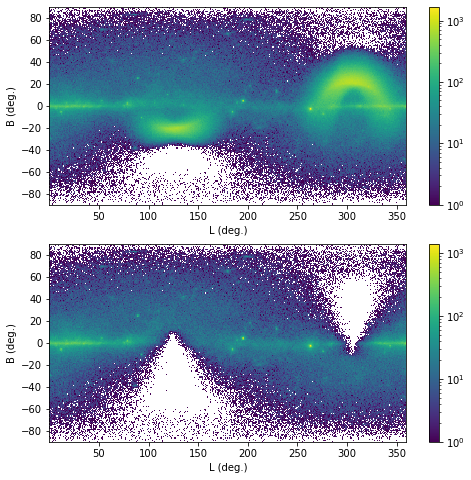

In [23]:
import os
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from astropy.io import fits
from astropy.table import Table
import numpy as np

class GammaFits:
    def __init__(self, fitsfile):
        self.fitsfile = fitsfile
        self.f1 = fits.open(self.fitsfile)
        self.events = Table.read(self.fitsfile, hdu=1)
        self.energy = self.events['ENERGY']
        self.L = self.events['L']
        self.B = self.events['B']
        self.zenith_angle = self.events['ZENITH_ANGLE']
    def show_info(self):
        fits.info(self.fitsfile)
        print(self.events.columns)
        print(self.events['ENERGY'].unit)
        print(self.events['ENERGY'][0])
    
    def plot_hist2d(self):
        fig, axs = plt.subplots(2, 1, figsize=(8, 8))

        emin_mask = self.energy > 50000.00

        l = self.events['L']
        b = self.events['B']
        axs[0].set_xlabel('L (deg.)', fontsize=10)
        axs[0].set_ylabel('B (deg.)', fontsize=10)
        counts0, xedges0, yedges0, im0 = axs[0].hist2d(self.L, self.B, bins=[360,180], norm=LogNorm())
        fig.colorbar(im0, ax=axs[0])


        zenith_angle_mask = self.zenith_angle < 80
        l_cut = self.L[zenith_angle_mask] 
        b_cut = self.B[zenith_angle_mask] 

        axs[1].set_xlabel('L (deg.)', fontsize=10)
        axs[1].set_ylabel('B (deg.)', fontsize=10)
        counts1, xedges1, yedges1, im1 = axs[1].hist2d(l_cut, b_cut, bins=[360,180], norm=LogNorm())
        fig.colorbar(im1, ax=axs[1])
        plt.show()

fitsfile = "/Users/tiffon/OneDrive - etu.u-bordeaux.fr/S10/HauteEnergie/w749-750/ sourcefiles/lat_photon_weekly_w749_p305_v001.fits"

gf = GammaFits(fitsfile)
gf.show_info()
gf.plot_hist2d()

113.00911
112.93785
112.07997
111.25126
115.891304
106.06443
110.63474
114.60108
62.594666
111.35134
112.76693


In [22]:
gf.info

AttributeError: 'GammaFits' object has no attribute 'info'

Filename: /Users/tiffon/OneDrive - etu.u-bordeaux.fr/S10/HauteEnergie/w749-750/ sourcefiles/lat_photon_weekly_w749_p305_v001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    199   1583674R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   106R x 2C   [D, D]   
Filename: /Users/tiffon/OneDrive - etu.u-bordeaux.fr/S10/HauteEnergie/w749-750/ sourcefiles/lat_photon_weekly_w750_p305_v001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    199   2135751R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   106R x 2C   [D, D]   
597704
573552


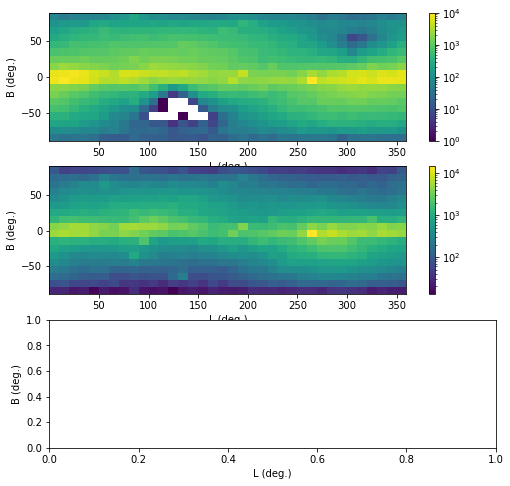

In [28]:
import os, glob, sys

# Set up matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from astropy.io import fits
from astropy.table import Table
import numpy as np				### numarray or numpy depends on the python install

fitsfile1='/Users/tiffon/OneDrive - etu.u-bordeaux.fr/S10/HauteEnergie/w749-750/ sourcefiles/lat_photon_weekly_w749_p305_v001.fits'  # path to your file number one
f1 = fits.open(fitsfile1)
fits.info(fitsfile1)
events1 = Table.read(fitsfile1,hdu=1)

fitsfile2='/Users/tiffon/OneDrive - etu.u-bordeaux.fr/S10/HauteEnergie/w749-750/ sourcefiles/lat_photon_weekly_w750_p305_v001.fits'  # path to your file number one
f2 = fits.open(fitsfile2)
fits.info(fitsfile2)
events2 = Table.read(fitsfile2,hdu=1)

# print various info (examples)
#print(events1.columns)
#print(events1['ENERGY'].unit)
#print(events1['ENERGY'][0])

fig, axs = plt.subplots(3, 1, figsize=(8, 8))

energy1 = events1['ENERGY']
emin_mask1 = energy1 > 50000.00
zenith_angle1 = events1['ZENITH_ANGLE']
zenith_angle_mask1 = zenith_angle1 < 100
time1 = events1['TIME']
time1_min = time1 > 3.108e8 
time1_max = time1 < 3.120e8
time1_cut = time1_min & time1_max
#time1_cut = time1_max
l1 = events1['L']
b1 = events1['B']
#mask1_tot = zenith_angle_mask1 & time1_cut
mask1_tot = zenith_angle_mask1
l1_cut = l1[mask1_tot] 
b1_cut = b1[mask1_tot] 
print(len(l1_cut))


energy2 = events2['ENERGY']
emin_mask2 = energy2 > 50000.00
zenith_angle2 = events2['ZENITH_ANGLE']
zenith_angle_mask2 = zenith_angle2 < 100
time2 = events2['TIME']
time2_min = time2 > 3.108e8 
time2_max = time2 < 3.120e8
time2_cut = time2_min & time2_max
#time2_cut = time2_max
mask2_tot = zenith_angle_mask2
l2 = events2['L']
b2 = events2['B']
l2_cut = l2[mask2_tot] 
b2_cut = b2[mask2_tot] 
print(len(l2_cut))

k=1

axs[0].set_xlabel('L (deg.)', fontsize=10)
axs[0].set_ylabel('B (deg.)', fontsize=10)
counts0, xedges0, yedges0, im0 = axs[0].hist2d(l1_cut,b1_cut,bins=k*[36,18],norm=LogNorm())
fig.colorbar(im0,ax=axs[0])

axs[1].set_xlabel('L (deg.)', fontsize=10)
axs[1].set_ylabel('B (deg.)', fontsize=10)
counts1, xedges1, yedges1, im1 = axs[1].hist2d(l2_cut,b2_cut,bins=k*[36,18],norm=LogNorm())
fig.colorbar(im1,ax=axs[1])

diff = counts0 - counts1
ratio = counts0 / counts1
#from PIL import Image
#pil_image=Image.fromarray(diff)
#pil_image.show()

#fig = plt.figure()
#plt.imshow(ratio)
#plt.title("Plot 2D array")
#plt.show()

axs[2].set_xlabel('L (deg.)', fontsize=10)
axs[2].set_ylabel('B (deg.)', fontsize=10)
axs[2] = diff, xedges1, yedges1, im0
#fig.colorbar(im2,ax=axs[2])

plt.show()